# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



**DATA VALIDATION**

For the Food Claims Process Dataset, I begin by conducting data manipulation or data validation to answer the following questions;

a. State whether the values match the description given in the table above. 
b. State the number of missing values in the column. 
c. Describe what you did to make values match the description if they did not match.

I proceed by conducting analysis using Python to answer the above questions followed a presentation of the results.

In [23]:
import numpy as np
import pandas as pd
food_data = pd.read_csv("food_claims_2212.csv")    #loading the dataset into workspace
food_data.info()   #acquiring info about the dataset and datatype of columns. 
food_data.isna().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


claim_id  time_to_close  claim_amount  amount_paid  location  individuals_on_claim  linked_cases  cause
False     False          False         False        False     False                 False         False    1938
                                       True         False     False                 False         False      36
                                       False        False     False                 True          False      26
dtype: int64

I read in the CSV file, and firstly, checked the data type of each column with the dtype attribute as well as calculated and counted all missing values. 

**The food claims data has 2000 rows and 8 columns.**


The following columns contains missing values;

**amount_paid: 36 missing values.**

**linked_cases: 26 missing values.**


Also, the results show that, claim_amount is an object, instead of a float(continous data). I shall therefore convert the data from object to float64 to match the criteria of the data dictionary.

# **claim_id**

In [24]:
food_data["claim_id"].nunique()   #checking number of unique values. 

2000

Findings: As in the data dictionary, there are 2000 unique values in the claim_id column which also confirms that the integer data type is also nominal. There are no missing values as well. 

# **time_to_close**

In [25]:
food_data["time_to_close"].min()   #checking to see if there a negative value. 

76

Findings: The time_to_close column does not have a negative value. Also, there are no missing values and the data type seen earlier on, supports the claim that the data is dicrete.



# **claim_amount**

In [26]:
food_data["claim_amount"].head()  #checking the first initial rows. 

0    R$ 74474.55
1    R$ 52137.83
2     R$ 24447.2
3    R$ 29006.28
4     R$ 19520.6
Name: claim_amount, dtype: object

To convert data to a float, I use the removeprefix() and astype() methods to remove the prefix "R$ " and convert data from object to float64.

In [27]:
# removing prefix and converting data to a float. 
food_data["claim_amount"] = food_data["claim_amount"].str.removeprefix("R$ ").astype("float") 

#checking the data type. 
food_data["claim_amount"].dtypes 

dtype('float64')

In [28]:

food_data["claim_amount"].head()  #checking the first initial rows again. 

0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64

Findings: The data type of the claim_amount variable has been converted to float to reflect the data dictionary. The values are also in two decimal places and the data type is float hence, continous data. 

# **amount_paid** 



To handle the issue of missing values detected earlier in the amount_paid, I shall replace missing values with the overall median amount paid and round to two decimal places. 

In [29]:
#replacing missing values with median and rounding the value
food_data["amount_paid"].fillna(round(food_data["amount_paid"].median(), 2), inplace=True) 

#checking to see if missing values still exist. 
food_data["amount_paid"].isna().value_counts()  


False    2000
Name: amount_paid, dtype: int64

In [30]:
food_data["amount_paid"].head() #checking few rows.  

0    51231.37
1    42111.30
2    23986.30
3    27942.72
4    16251.06
Name: amount_paid, dtype: float64

Findings: The 36 missing values in amount_paid column have been replaced by the median of the amount_paid. The results have been rounded to two decimal places. Amount_paid is float hence continous. 

# **location**

In [31]:
food_data["location"].value_counts()   #counting the number of distinct entries. 

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

Findings: There are four unique values as expected. They are: “RECIFE”, “SAO LUIS”, “FORTALEZA”, and “NATAL”. There are no missing values in the column. 

# **individuals_on_claim**

In [32]:
food_data["individuals_on_claim"].min()   #checking the minimum value. 


1

Findings: The lowest value in the individuals_on_claim column is 1 as stipulated in the data dictionary. The 'int' datatype supports the claim that the data is discrete. 

# **linked_cases** 

In [33]:
food_data["linked_cases"].value_counts()  #checking distinct entries. 

False    1493
True      481
Name: linked_cases, dtype: int64

In [34]:
food_data["linked_cases"].isna().value_counts()  #counting missing values in this column. 

False    1974
True       26
Name: linked_cases, dtype: int64

There are 26 missing values in this column. Per the data dictionary, I shall replace missing values with 'False.'  

In [35]:
food_data["linked_cases"].fillna(False, inplace=True)   #replacing missing values with False. 
food_data["linked_cases"].isna().value_counts()  #checking missing values again. 

False    2000
Name: linked_cases, dtype: int64

Findings: All missing values in the linked_cases column have been replaced with 'False', hence there are nomore missing values. 

# **cause**

In [36]:
food_data["cause"].value_counts()  # checking the count of distinct values.

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

Per the data dictionary, the cause column must have only the following entries; “vegetable”, “meat” or “unknown”. Per the results returned, 'VEGETABLES' must be recoded as 'vegetable' and 'Meat' shall be recoded to 'meat' so keep only three entries earlier mentioned. 

In [37]:
# recoding 'VEGETABLES' as 'vegetable' and 'Meat' as 'meat'
food_data["cause"] = (
    food_data["cause"].str.lower().str.lstrip().replace(["VEGETABLES", "vegetable"], [" Meat", "meat"])
)

food_data["cause"].value_counts()  #checking the count of distinct values again. 

meat          1271
unknown        713
vegetables      16
Name: cause, dtype: int64

I have recoded 30 unexpected values to 'meat' and 'vegetables' respectively. There are no missing values. The column entries now reflects the data dictionary. 

## Task 2

**DATA VISUALIZATION WITH BAR GRAPH**

Drawing a bar plot that depicts the number of claims in each location. Based on that, I discuss;

a. which category of the variable location has the most observations 
b. whether the observations are balanced across categories of the variable location. 

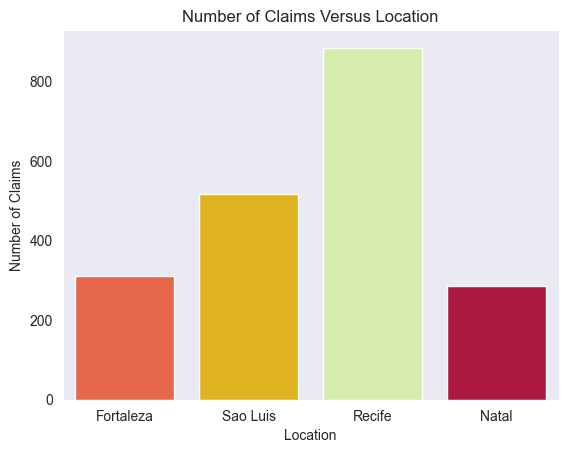

In [38]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("dark")   #setting the seaborn theme to dark. 

my_colors = ["#FF5733", "#FFC300", "#DAF7A6", "#C70039"]   #assigning some colors to a variable. 

#plotting the count of various locations.
sb.countplot(
    x=food_data["location"].str.title(), 
    order=["Fortaleza", "Sao Luis", "Recife", "Natal"], palette = my_colors)  


plt.title("Number of Claims Versus Location")  
plt.xlabel("Location")
plt.ylabel("Number of Claims")

plt.show()


**DISCUSSION OF RESULTS IN TASK 2**

a. According to the bar graph above, Recife is the location with the highest number of claims.

b. From the bar graph above, the observations are not balanced across the various locations. Aside Recife being the highest category with a wider gap than the others, Sao Luis is also much higher than Fortaleza and Natal. Nonetheless, Fortaleza and Natal seem to be much closer to each other regarding the count of claims.

## Task 3

**DATA VISUALIZATION  WITH HISTOGRAM** 

Next, I shall describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution. 

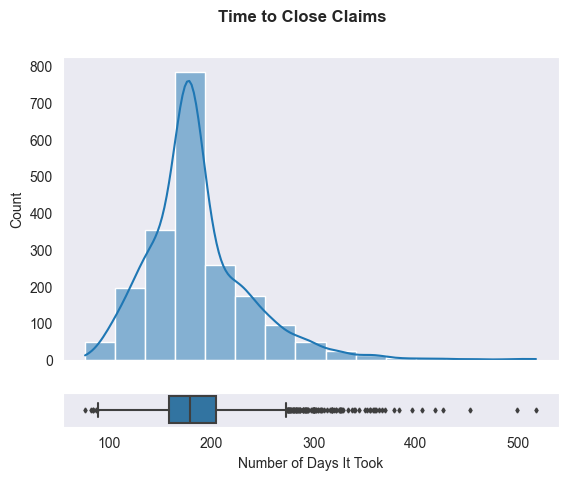

In [39]:
fig, (ax_hist, ax_box) = plt.subplots(
    2, sharex='all', gridspec_kw={"height_ratios": (0.9, 0.1)}  #setting up the type of plots. 
)

sb.histplot(data=food_data, x="time_to_close", ax=ax_hist, kde=True, bins = 15) #histogram
sb.boxplot(data=food_data, x="time_to_close", ax=ax_box, fliersize=2.5)   #box plot

fig.suptitle("Time to Close Claims", fontweight="bold")
plt.xlabel("Number of Days It Took")

plt.show()

**DISCUSSION OF RESULTS IN TASK 3**

From the histogram above, most claims, which is about 780 claims, take about 200 days to be closed. Most claims completed overall fall within the 75th percentile. About 50 or less claims take over 300 days to complete. There are a few rare number of cases(outliers) that take as long as between 400 - 500 days to complete. The distribution is slightly normally distributed and the median number of days for a claim to be completed is about 179 days.

## Task 4

**DATA VISUALIZATION WITH BOX PLOT**

Finally, I describe the relationship between time to close and location. I answer using a visualization to demonstrate the relationship. 

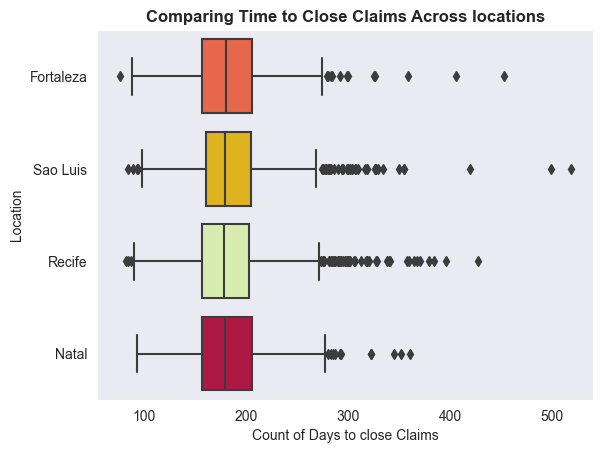

In [40]:
sb.boxplot(
    y=food_data["location"].str.title(),
    x=food_data["time_to_close"],
   order=["Fortaleza", "Sao Luis", "Recife", "Natal"],
    palette=["#FF5733", "#FFC300", "#DAF7A6", "#C70039"] 
)  #setting up the boxplot and aesthetics. 

plt.title(
    "Comparing Time to Close Claims Across locations", fontweight="bold"
)
plt.xlabel("Count of Days to close Claims")
plt.ylabel("Location")

plt.show()

**DISCUSSION OF RESULTS IN TASK 4**

With reference to the box plot above, there seem to be a large degree of similarity between the time to close claims across locations. However, some differences exist. Aside Natal, there are a few number of claims in Fortaleza, Sao Luis and Recife that takes less than 100 days to complete. Natal is also the location where there are less claims that takes over 300 days to complete. It seems that the outliers in Sao Luis and Recife are higher than Fortaleza which implies that most of the outliers that was observed overall in Task 3 may be coming from these two locations. Recife, followed by Sao Luis recieves the highest number of claims overall when referring from the initial box plot hence it gives an indication why some claims take extremely long to close in Recife and Sao Luis.